In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (
    precision_score,
    recall_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

In [3]:
# Load the Breast Cancer dataset
data = datasets.load_breast_cancer()
X, y = data.data, data.target  # capture the features data and target variables

# Display basic information about the dataset
print(f"Feature shape: {X.shape}")
print(f"Target shape: {y.shape}")

Feature shape: (569, 30)
Target shape: (569,)


In [4]:
# Train and evaluate a model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # train and make predicion
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # capture recall, precision, and confusion matrix
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    return recall, precision, cm


# Plot confusion matrix
def plot_confusion_matrix(cm, labels, title="Confusion Matrix"):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()


# Plot recall and precision vs number of features
def plot_recall_precision_vs_features(
    num_features, recall_values, precision_values, classifier_name
):
    # Plot Recall vs Number of Features
    plt.figure(figsize=(8, 6))
    plt.plot(num_features, recall_values, label="Recall", marker="o")
    plt.xlabel("Number of Features")
    plt.ylabel("Recall")
    plt.title(f"Recall vs. Number of Features ({classifier_name})")
    plt.grid(True)
    plt.legend()
    plt.show()

    # Plot Precision vs Number of Features
    plt.figure(figsize=(8, 6))
    plt.plot(num_features, precision_values, label="Precision", marker="s")
    plt.xlabel("Number of Features")
    plt.ylabel("Precision")
    plt.title(f"Precision vs. Number of Features ({classifier_name})")
    plt.grid(True)
    plt.legend()
    plt.show()

In [5]:
# Train and evalute classifiers
def evaluate_classifiers(X_train, X_test, y_train, y_test, classifier_type="logistic"):
    recall_values = []
    precision_values = []
    num_features = list(range(1, 31))
    
    # Loop through the models using incremental number of features
    for num in num_features:
        # Use the first 'num' features for both test and training set
        X_train_subset = X_train[:, :num]
        X_test_subset = X_test[:, :num]
        
        if classifier_type == "logistic":
            model = LogisticRegression(max_iter=5000)
        elif classifier_type == "svm_linear":
            model = SVC(kernel='linear')
        elif classifier_type == "svm_rbf":
            model = SVC(kernel='rbf')
        
        recall, precision, cm = evaluate_model(model, X_train_subset, X_test_subset, y_train, y_test)
        recall_values.append(recall)
        precision_values.append(precision)
        
        # Plot confusion matrix for the final model (using all features)
        if num == 30:
            plot_confusion_matrix(cm, data.target_names, title=f"{classifier_type.capitalize()} Confusion Matrix")

    # Plot Recall and Precision curves
    plot_recall_precision_vs_features(num_features, recall_values, precision_values, classifier_type)
    

In [6]:
# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the training and test sets
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (455, 30)
Test data shape: (114, 30)


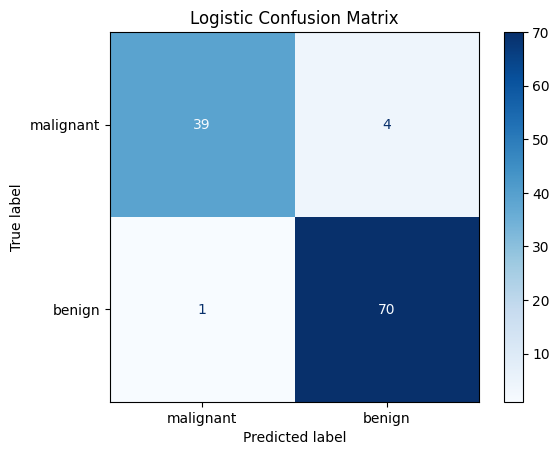

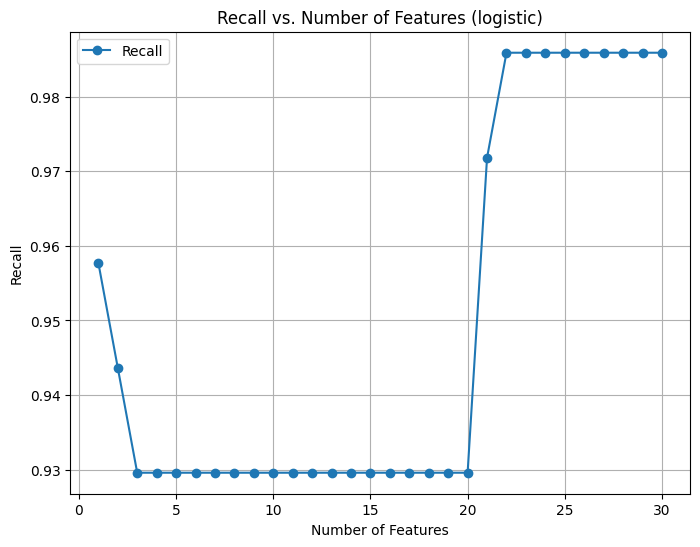

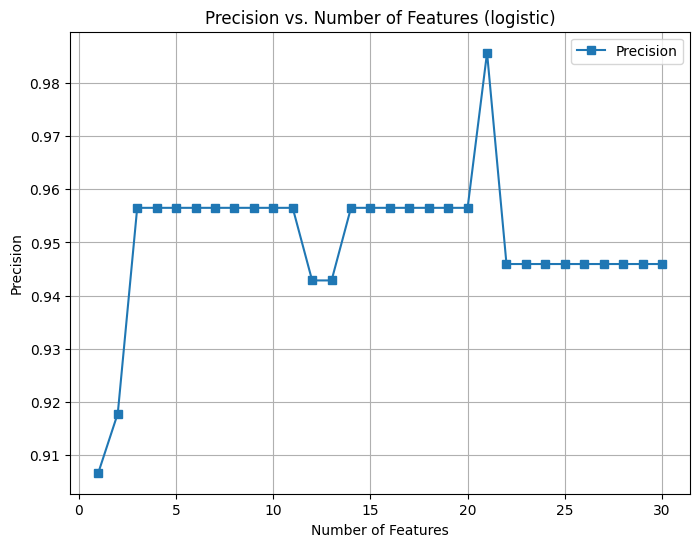

In [7]:
# Evaluate Logistic Regression model
evaluate_classifiers(X_train, X_test, y_train, y_test, classifier_type="logistic")

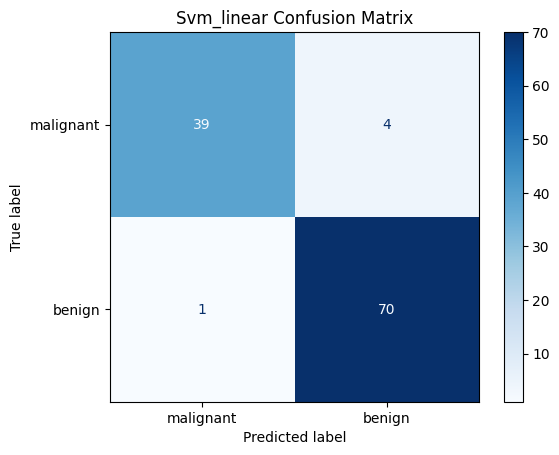

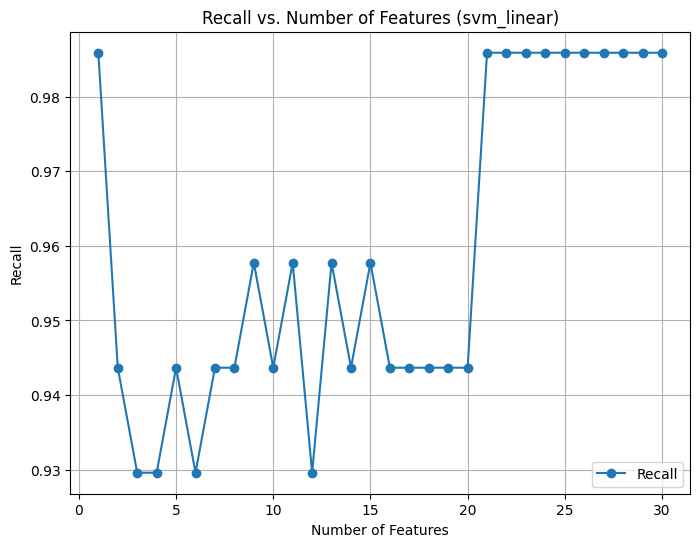

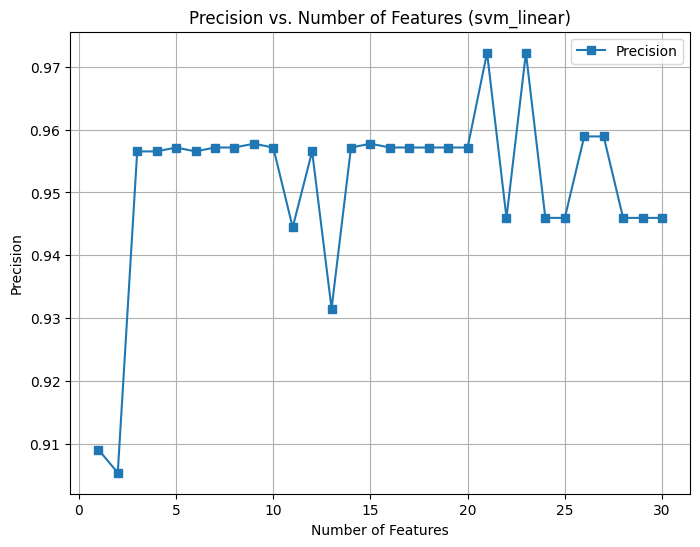

In [8]:
# Evaluate SVM classifier with linear kernel
evaluate_classifiers(X_train, X_test, y_train, y_test, classifier_type="svm_linear")


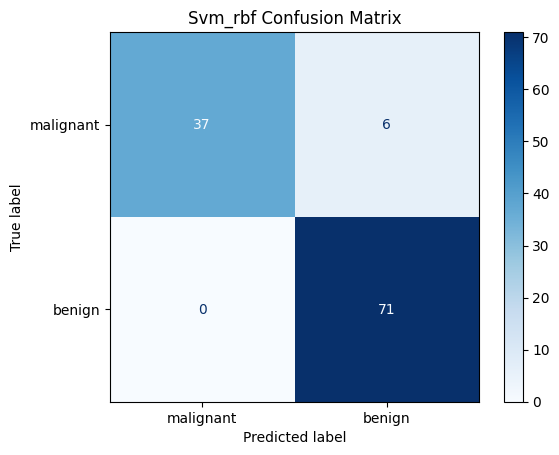

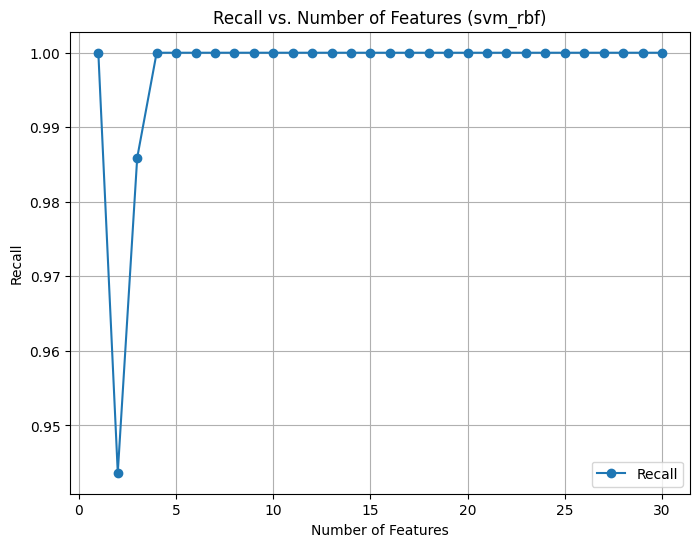

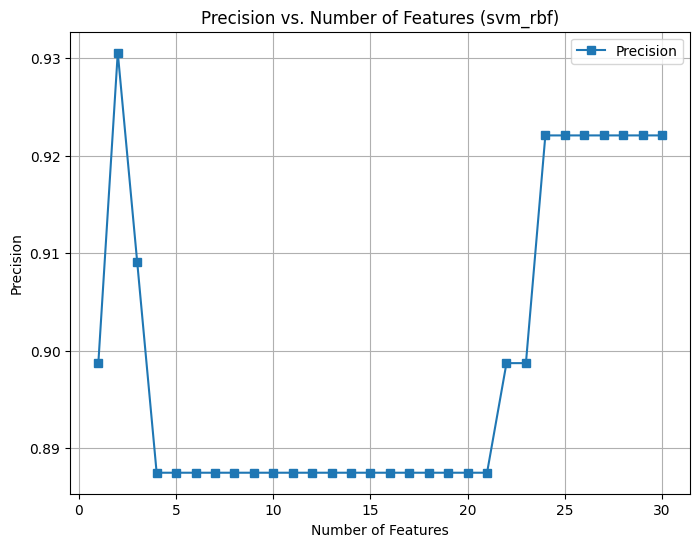

In [9]:
# Evaluate SVM classifier with RBF (Gaussian) kernel
evaluate_classifiers(X_train, X_test, y_train, y_test, classifier_type="svm_rbf")